# SANKALP JAIN

In this task, we have to create a hybrid model for stock price/performance prediction using
numerical analysis of historical stock prices, and sentimental analysis
of news headlines

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('News.csv')
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [3]:
#Combine the top news headlines
headlines = []
for row in range(0,len(df)):
    headlines.append(' '.join(str(x) for x in df.iloc[row,2:27]))

Cleaning the data

In [4]:
import re
#Clean the data
clean_headlines = []
for i in range(0, len(headlines)):
    clean_headlines.append(re.sub("b[(')]+", '', headlines[i] ))
    clean_headlines[i] = re.sub('b[(")]+', '', clean_headlines[i] )
    clean_headlines[i] = re.sub("\'", '', clean_headlines[i] )

In [5]:
df['Combined_News'] = clean_headlines


In [6]:
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P

In [7]:
new_df=df[['Date','Label','Combined_News']]

In [8]:
new_df

,Date,Label,Combined_News
0,2008-08-08,0,Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,Why wont America and Nato help us? If they won...
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,All the experts admit that we should legalise ...
...,...,...,...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ..."
1986,2016-06-29,1,Explosion At Airport In Istanbul Yemeni former...
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...


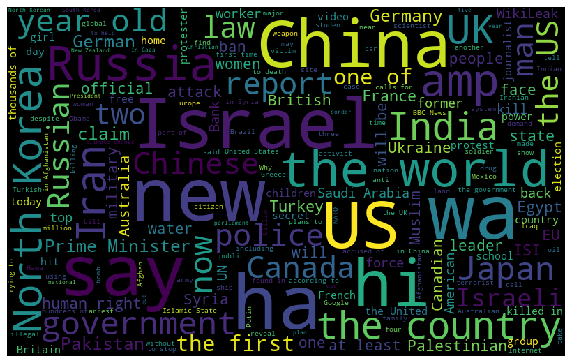

In [9]:
from wordcloud import WordCloud
all_words=' '.join([text for text in new_df['Combined_News']])
wordcloud=WordCloud(height=500,width=800,max_font_size=110,random_state=21).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(array([ 20.,  78., 185., 386., 504., 476., 234.,  89.,  12.,   5.]),
 array([1393. , 1687.7, 1982.4, 2277.1, 2571.8, 2866.5, 3161.2, 3455.9,
        3750.6, 4045.3, 4340. ]),
 <a list of 10 Patch objects>)

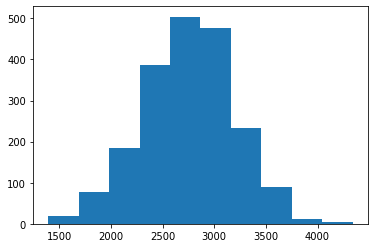

In [10]:
plt.hist(new_df['Combined_News'].str.len())



In [11]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer 


In [12]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [13]:
# Create two new columns 'Subjectivity' & 'Polarity'
new_df['Subjectivity'] = new_df['Combined_News'].apply(getSubjectivity)
new_df['Polarity'] = new_df['Combined_News'].apply(getPolarity)

C:\Users\sanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
new_df

,Date,Label,Combined_News,Subjectivity,Polarity
0,2008-08-08,0,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568
1,2008-08-11,1,Why wont America and Nato help us? If they won...,0.374806,0.121956
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398
4,2008-08-14,1,All the experts admit that we should legalise ...,0.375099,0.040677
...,...,...,...,...,...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,0.352311,-0.014015
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...",0.352649,0.046560
1986,2016-06-29,1,Explosion At Airport In Istanbul Yemeni former...,0.389617,0.052622
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,0.382566,0.011243


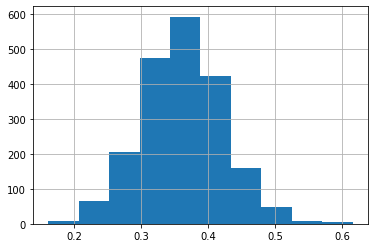

In [15]:
plt.figure(figsize=(6,4))
new_df['Subjectivity'].hist()
plt.show()

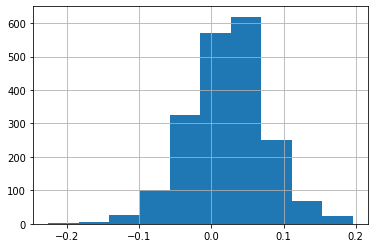

In [16]:
plt.figure(figsize=(6,4))
new_df['Polarity'].hist()
plt.show()

In [18]:
results = []

for headline in new_df['Combined_News']:
    pol_score = SentimentIntensityAnalyzer().polarity_scores(headline) # run analysis
    pol_score['headline'] = headline # add headlines for viewing
    results.append(pol_score)

results

[{'neg': 0.226,
  'neu': 0.717,
  'pos': 0.057,
  'compound': -0.9975,
  'headline': 'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. 

In [19]:
new_df['Compound']=pd.DataFrame(results)['compound']
new_df['Positive']=pd.DataFrame(results)['pos']
new_df['Neutral']=pd.DataFrame(results)['neu']
new_df['Negative']=pd.DataFrame(results)['neg']

C:\Users\sanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [20]:
new_df

,Date,Label,Combined_News,Subjectivity,Polarity,Compound,Positive,Neutral,Negative
0,2008-08-08,0,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9975,0.057,0.717,0.226
1,2008-08-11,1,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9814,0.099,0.712,0.189
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9778,0.052,0.811,0.137
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9853,0.054,0.796,0.150
4,2008-08-14,1,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9899,0.091,0.705,0.204
...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,0.352311,-0.014015,-0.9818,0.088,0.750,0.162
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...",0.352649,0.046560,-0.9666,0.099,0.765,0.136
1986,2016-06-29,1,Explosion At Airport In Istanbul Yemeni former...,0.389617,0.052622,-0.9976,0.090,0.680,0.230
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,0.382566,0.011243,-0.9977,0.062,0.733,0.205


Importing numerical data

In [21]:
num_df=pd.read_csv('Stock.csv')
num_df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


In [22]:
num_df['HL_pct']=((num_df['High']-num_df['Low'])/num_df['Low'])*100
num_df['PCT_change']=((num_df['Close']-num_df['Open'])/num_df['Open'])*100

In [23]:
num_df.drop(columns=['Open','High','Close','Low'],inplace=True)
num_df

,Date,Volume,Adj Close,HL_pct,PCT_change
0,2016-07-01,82160000,17949.369141,0.477039,0.140195
1,2016-06-30,133030000,17929.990234,1.235383,1.226407
2,2016-06-29,106380000,17694.679688,1.423522,1.367208
3,2016-06-28,112190000,17409.720703,1.275186,1.275186
4,2016-06-27,138740000,17140.240234,1.712064,-1.238652
...,...,...,...,...,...
1984,2008-08-14,159790000,11615.929688,2.335108,0.727184
1985,2008-08-13,182550000,11532.959961,1.575439,-0.858345
1986,2008-08-12,173590000,11642.469727,1.558676,-1.181752
1987,2008-08-11,183190000,11782.349609,1.640868,0.449115


In [24]:
merge_data = new_df.merge(num_df, how='inner', on='Date', left_index = True)


In [25]:
merge_data

,Date,Label,Combined_News,Subjectivity,Polarity,Compound,Positive,Neutral,Negative,Volume,Adj Close,HL_pct,PCT_change
1988,2008-08-08,0,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9975,0.057,0.717,0.226,212830000,11734.320312,3.265882,2.643703
1987,2008-08-11,1,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9814,0.099,0.712,0.189,183190000,11782.349609,1.640868,0.449115
1986,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9778,0.052,0.811,0.137,173590000,11642.469727,1.558676,-1.181752
1985,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9853,0.054,0.796,0.150,182550000,11532.959961,1.575439,-0.858345
1984,2008-08-14,1,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9899,0.091,0.705,0.204,159790000,11615.929688,2.335108,0.727184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2016-06-27,0,Barclays and RBS shares suspended from trading...,0.352311,-0.014015,-0.9818,0.088,0.750,0.162,138740000,17140.240234,1.712064,-1.238652
3,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...",0.352649,0.046560,-0.9666,0.099,0.765,0.136,112190000,17409.720703,1.275186,1.275186
2,2016-06-29,1,Explosion At Airport In Istanbul Yemeni former...,0.389617,0.052622,-0.9976,0.090,0.680,0.230,106380000,17694.679688,1.423522,1.367208
1,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,0.382566,0.011243,-0.9977,0.062,0.733,0.205,133030000,17929.990234,1.235383,1.226407


In [26]:
merge_data.reset_index(inplace=True)

In [27]:
merge_data

,index,Date,Label,Combined_News,Subjectivity,Polarity,Compound,Positive,Neutral,Negative,Volume,Adj Close,HL_pct,PCT_change
0,1988,2008-08-08,0,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9975,0.057,0.717,0.226,212830000,11734.320312,3.265882,2.643703
1,1987,2008-08-11,1,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9814,0.099,0.712,0.189,183190000,11782.349609,1.640868,0.449115
2,1986,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9778,0.052,0.811,0.137,173590000,11642.469727,1.558676,-1.181752
3,1985,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9853,0.054,0.796,0.150,182550000,11532.959961,1.575439,-0.858345
4,1984,2008-08-14,1,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9899,0.091,0.705,0.204,159790000,11615.929688,2.335108,0.727184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,4,2016-06-27,0,Barclays and RBS shares suspended from trading...,0.352311,-0.014015,-0.9818,0.088,0.750,0.162,138740000,17140.240234,1.712064,-1.238652
1985,3,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...",0.352649,0.046560,-0.9666,0.099,0.765,0.136,112190000,17409.720703,1.275186,1.275186
1986,2,2016-06-29,1,Explosion At Airport In Istanbul Yemeni former...,0.389617,0.052622,-0.9976,0.090,0.680,0.230,106380000,17694.679688,1.423522,1.367208
1987,1,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,0.382566,0.011243,-0.9977,0.062,0.733,0.205,133030000,17929.990234,1.235383,1.226407


In [35]:
Combined=merge_data.drop(columns=['index','Label','Combined_News','Volume'])
Combined.head()

,Date,Subjectivity,Polarity,Compound,Positive,Neutral,Negative,Adj Close,HL_pct,PCT_change
0,2008-08-08,0.267549,-0.048568,-0.9975,0.057,0.717,0.226,11734.320312,3.265882,2.643703
1,2008-08-11,0.374806,0.121956,-0.9814,0.099,0.712,0.189,11782.349609,1.640868,0.449115
2,2008-08-12,0.536234,-0.044302,-0.9778,0.052,0.811,0.137,11642.469727,1.558676,-1.181752
3,2008-08-13,0.364021,0.011398,-0.9853,0.054,0.796,0.150,11532.959961,1.575439,-0.858345
4,2008-08-14,0.375099,0.040677,-0.9899,0.091,0.705,0.204,11615.929688,2.335108,0.727184


In [55]:
Combined=merge_data[['Date','Subjectivity','Adj Close','HL_pct','PCT_change']]
Combined.head()

,Date,Subjectivity,Adj Close,HL_pct,PCT_change
0,2008-08-08,0.267549,11734.320312,3.265882,2.643703
1,2008-08-11,0.374806,11782.349609,1.640868,0.449115
2,2008-08-12,0.536234,11642.469727,1.558676,-1.181752
3,2008-08-13,0.364021,11532.959961,1.575439,-0.858345
4,2008-08-14,0.375099,11615.929688,2.335108,0.727184


In [56]:
Combined['Date']

0       2008-08-08
1       2008-08-11
2       2008-08-12
3       2008-08-13
4       2008-08-14
           ...    
1984    2016-06-27
1985    2016-06-28
1986    2016-06-29
1987    2016-06-30
1988    2016-07-01
Name: Date, Length: 1989, dtype: object

In [57]:
from datetime import datetime
Combined['Date']=pd.to_datetime(Combined['Date'])
Combined.set_index('Date',inplace=True)
Combined.index

C:\Users\sanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


DatetimeIndex(['2008-08-08', '2008-08-11', '2008-08-12', '2008-08-13',
               '2008-08-14', '2008-08-15', '2008-08-18', '2008-08-19',
               '2008-08-20', '2008-08-21',
               ...
               '2016-06-20', '2016-06-21', '2016-06-22', '2016-06-23',
               '2016-06-24', '2016-06-27', '2016-06-28', '2016-06-29',
               '2016-06-30', '2016-07-01'],
              dtype='datetime64[ns]', name='Date', length=1989, freq=None)

In [58]:
Combined.head()

,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,
2008-08-08,0.267549,11734.320312,3.265882,2.643703
2008-08-11,0.374806,11782.349609,1.640868,0.449115
2008-08-12,0.536234,11642.469727,1.558676,-1.181752
2008-08-13,0.364021,11532.959961,1.575439,-0.858345
2008-08-14,0.375099,11615.929688,2.335108,0.727184


In [69]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
sc=MinMaxScaler()
new_Combined=pd.DataFrame(sc.fit_transform(Combined))
new_Combined.columns=Combined.columns
new_Combined.index=Combined.index
new_Combined.head()

,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,
2008-08-08,0.234005,0.440894,0.242921,0.557111
2008-08-11,0.470301,0.444976,0.115545,0.439856
2008-08-12,0.825941,0.433087,0.109103,0.352719
2008-08-13,0.446541,0.423779,0.110417,0.369999
2008-08-14,0.470947,0.430832,0.169963,0.454713


In [72]:
cols=new_Combined.columns

In [75]:
train=new_Combined[:int(0.9*(len(new_Combined)))]
valid=new_Combined[int(0.9*(len(new_Combined))):]

In [76]:
from statsmodels.tsa.vector_ar.var_model import VAR
model=VAR(endog=train)
model_fit=model.fit()

prediction=model_fit.forecast(model_fit.y,steps=len(valid))
prediction=pd.DataFrame(prediction,columns=cols)
prediction

C:\Users\sanka\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,Subjectivity,Adj Close,HL_pct,PCT_change
0,0.408930,0.861062,0.102558,0.417653
1,0.423048,0.861095,0.081745,0.416274
2,0.424548,0.861156,0.068856,0.416257
3,0.424732,0.861215,0.060800,0.416092
4,0.424765,0.861276,0.055808,0.415998
...,...,...,...,...
194,0.424208,0.872182,0.045964,0.415775
195,0.424205,0.872237,0.045955,0.415775
196,0.424202,0.872291,0.045947,0.415774
197,0.424199,0.872345,0.045938,0.415774


In [77]:
prediction=prediction.set_index(valid.index)
prediction.head()

,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,
2015-09-18,0.408930,0.861062,0.102558,0.417653
2015-09-21,0.423048,0.861095,0.081745,0.416274
2015-09-22,0.424548,0.861156,0.068856,0.416257
2015-09-23,0.424732,0.861215,0.060800,0.416092
2015-09-24,0.424765,0.861276,0.055808,0.415998


In [78]:
valid

,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,
2015-09-18,0.242323,0.836145,0.145664,0.322886
2015-09-21,0.390027,0.846821,0.076214,0.449759
2015-09-22,0.474184,0.831546,0.110492,0.368201
2015-09-23,0.711921,0.827247,0.056217,0.398548
2015-09-24,0.371738,0.820569,0.104750,0.397524
...,...,...,...,...
2016-06-27,0.420742,0.900373,0.121126,0.349679
2016-06-28,0.421487,0.923277,0.086881,0.483992
2016-06-29,0.502931,0.947497,0.098509,0.488909


In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
np.sqrt(mean_squared_error(prediction['Adj Close'],valid['Adj Close']))

0.06918451352517672